In [19]:
import random

from mxnet import autograd as ag
from mxnet import gluon
from mxnet import ndarray as nd

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
from matplotlib import pyplot as plt

import utils

num_train = 20
num_test = 100
num_inputs = 200
true_w = nd.ones((num_inputs, 1)) * 0.01
true_b = 0.05

x = nd.random_normal(shape=(num_train+num_test, num_inputs))
y = nd.dot(x, true_w)
y += .1 * nd.random.normal(shape=y.shape)

x_train, x_test = x[:num_train,:], x[num_train:, :]
y_train, y_test = y[:num_train], y[num_train:]

In [20]:
batch_size = 1


def data_iter(num_examples):
    idx = list(range(num_examples))
    random.shuffle(idx)
    for i in range(0, num_examples, batch_size):
        j = nd.array(idx[i:min(i+batch_size, num_examples)])
        yield x.take(j), y.take(j)

In [21]:
def get_params():
    w = nd.random.normal(shape=(num_inputs, 1)) * 0.1
    b = nd.zeros((1,))
    for param in (w, b):
        param.attach_grad()
    return (w, b)

In [22]:
def net(x, lambd, w, b):
    return nd.dot(x, w) + b

In [23]:
def test(params, x, y):
    return utils.square_loss(net(x, 0, *params), y).mean().asscalar()

In [24]:
def train(lambd):
    epochs = 10
    learning_rate = 0.002
    params = get_params()
    train_loss = []
    test_loss = []
    for e in range(epochs):
        for data, label in data_iter(num_train):
            with ag.record():
                output = net(data, lambd, *params)
                w, b = params
                loss = utils.square_loss(output, label)  + lambd * ((w**2).sum() + b ** 2)
            loss.backward()
            utils.SGD(params, learning_rate)
        train_loss.append(test(params, x_train, y_train))
        test_loss.append(test(params, x_test, y_test))
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train', 'test'])
    plt.show()
    return 'learned w[:10]: ', params[0][:10], 'learned b:', params[1]

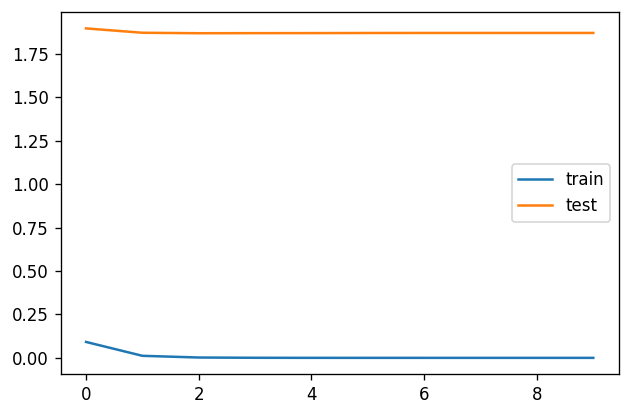

('learned w[:10]: ', 
 [[-0.04397595]
  [ 0.01845063]
  [ 0.14773315]
  [-0.0079367 ]
  [ 0.033254  ]
  [ 0.17499653]
  [ 0.09965371]
  [-0.11256923]
  [ 0.11782352]
  [-0.20204853]]
 <NDArray 10x1 @cpu(0)>, 'learned b:', 
 [-0.01077916]
 <NDArray 1 @cpu(0)>)

In [25]:
train(0)

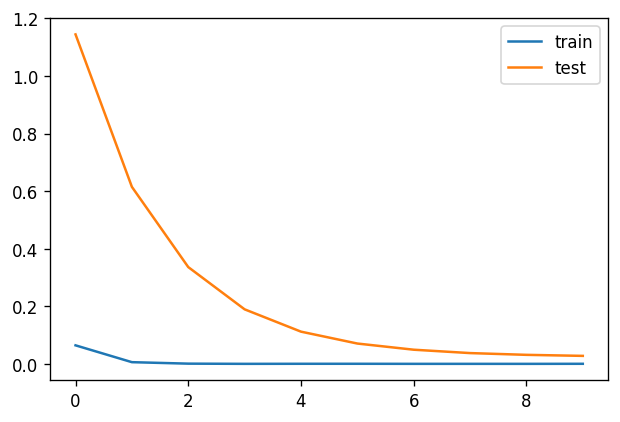

('learned w[:10]: ', 
 [[ 0.00028819]
  [-0.00486671]
  [ 0.0032422 ]
  [-0.00114265]
  [ 0.00677996]
  [ 0.00355837]
  [ 0.00655031]
  [-0.0029113 ]
  [-0.00029653]
  [-0.0025506 ]]
 <NDArray 10x1 @cpu(0)>, 'learned b:', 
 [0.00335162]
 <NDArray 1 @cpu(0)>)

In [26]:
train(4)